来源 https://mp.weixin.qq.com/s/DY_K1CisYElFL7Tt0Si6hw

# 1 导入库

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

# 2 关联（Correlation）关系图

## 2.1 散点图（Scatter plot）
该图展示两个变量间的关系，matplotlib中使用plt.scatter()函数。当数据包含多组时，可以使用不同颜色或者形状区分

E:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


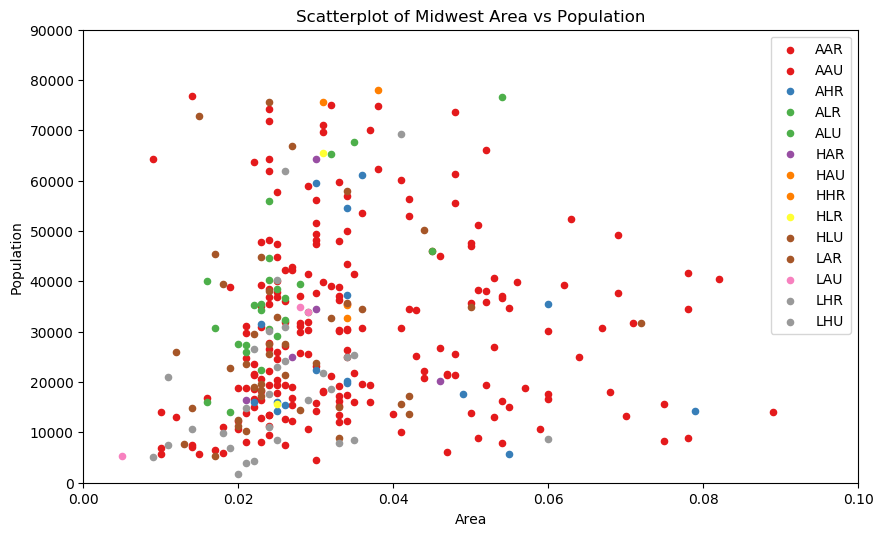

In [4]:
# Import dataset
midwest = pd.read_csv("E:/git/python_Visualization-example/datasets/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [
    plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))
]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area',
                'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s=20,
                c=colors[i],
                label=str(category))

# Decorations
plt.gca().set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Area', fontdict={'fontsize': 10})
plt.ylabel('Population', fontdict={'fontsize': 10})
plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)
plt.legend(fontsize=10)
plt.show()

## 2.2 边界气泡图（Bubble plot with Encircling）
此图为散点图，使用边界圈住一部分点，以强调其重要性。

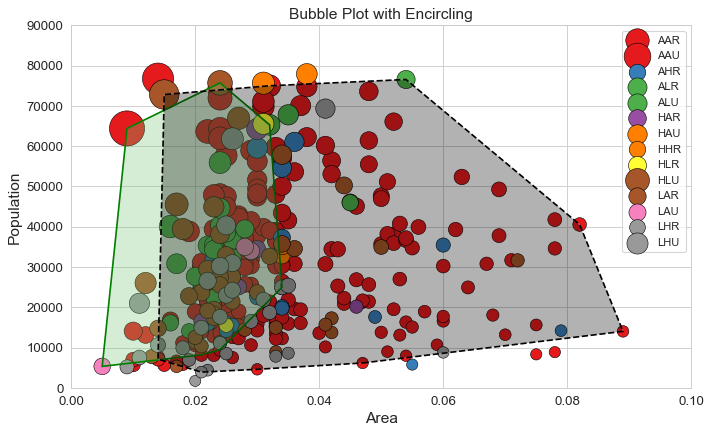

In [10]:
from matplotlib import patches
from scipy.spatial import ConvexHull  #更多参考scipy.spatial.ConvexHull
sns.set_style("whitegrid")

# Step 1: Prepare Data
midwest = pd.read_csv("E:/git/python_Visualization-example/datasets/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [
    plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))
]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area',
                'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s='dot_size',
                c=colors[i],
                label=str(category),
                edgecolors='black',
                linewidths=.5)


# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):  #定义encircle函数，圈出重点关注的点
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data1 = midwest.loc[midwest.state == 'IN', :]
encircle(midwest_encircle_data1.area,
         midwest_encircle_data1.poptotal,
         ec="pink",
         fc="#74C476",
         alpha=0.3)
encircle(midwest_encircle_data1.area,
         midwest_encircle_data1.poptotal,
         ec="g",
         fc="none",
         linewidth=1.5)

midwest_encircle_data6 = midwest.loc[midwest.state == 'WI', :]
encircle(midwest_encircle_data6.area,
         midwest_encircle_data6.poptotal,
         ec="pink",
         fc="black",
         alpha=0.3)
encircle(midwest_encircle_data6.area,
         midwest_encircle_data6.poptotal,
         ec="black",
         fc="none",
         linewidth=1.5,
         linestyle='--')

# Step 4: Decorations
plt.gca().set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Area', fontdict={'fontsize': 14})
plt.ylabel('Population', fontdict={'fontsize': 14})
plt.title("Bubble Plot with Encircling", fontsize=14)
plt.legend(fontsize=10)
plt.show()

## 2.3 散点图添加趋势线（Scatter plot with linear regression line of best fit）

E:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 3000x2000 with 0 Axes>

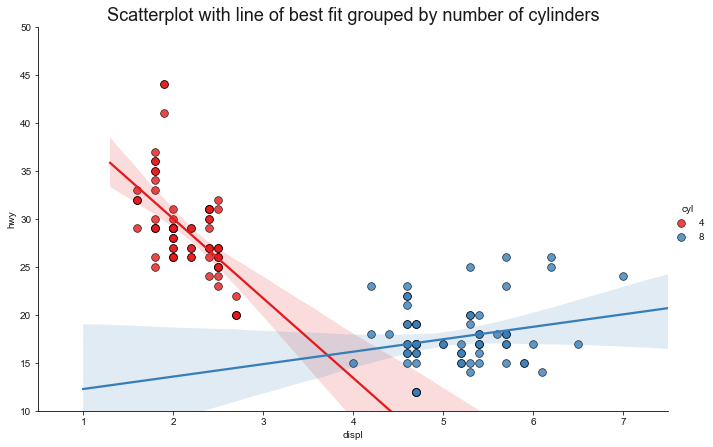

In [4]:
# Import Data
plt.figure(dpi=500)
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot

gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df_select,
    height=7,
    aspect=1.6,  #robust=True, 
    palette='Set1',
    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 50))
gridobj.fig.set_size_inches(10, 6)
plt.title("Scatterplot with line of best fit grouped by number of cylinders")
plt.show()